# Regressions

## Linear regressions

__Import the Duncan/carData dataset__

In [1]:
import statsmodels.api as sm
dataset = sm.datasets.get_rdataset("Duncan", "carData")
df = dataset.data
df.head()

,type,income,education,prestige
rownames,,,,
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [2]:
df.describe()

,income,education,prestige
count,45.000000,45.000000,45.000000
mean,41.866667,52.555556,47.688889
std,24.435072,29.760831,31.510332
min,7.000000,7.000000,3.000000
25%,21.000000,26.000000,16.000000
50%,42.000000,45.000000,41.000000
75%,64.000000,84.000000,81.000000
max,81.000000,100.000000,97.000000


__Estimate by hand the model $\text{income} = \alpha + \beta  \times \text{education}$ . Plot.__

In [3]:
Σ = df[ ['income', 'education'] ].cov()

In [4]:
β = Σ.loc['income','education'] / Σ.loc['education','education']

In [5]:
β

0.5948594400410561

In [6]:
μ = df[ ['income', 'education'] ].mean()
μ

income       41.866667
education    52.555556
dtype: float64

In [7]:
α = μ['income'] - β*μ['education']

In [8]:
α

10.603498317842273

In [9]:
prediction = α + β*df['education']

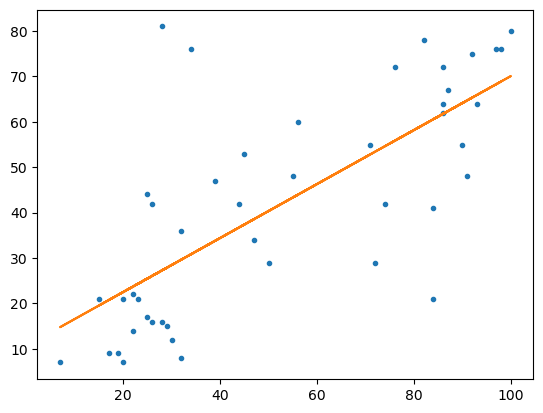

In [10]:
from matplotlib import pyplot as plt
plt.plot(df['education'], df['income'], '.')
plt.plot(df['education'], prediction)

__Compute total, explained, unexplained variance. Compute R^2 statistics__

In [11]:
df['prediction'] = α + β*df['education']
df['error_term'] =  df['income'] - prediction

In [12]:
Sigma = df[['income', 'education', 'prediction', 'error_term']].cov()

In [13]:
total_variance = Sigma.loc['income','income'] 

In [14]:
prediction_variance = Sigma.loc['prediction','prediction']

In [15]:
error_variance = Sigma.loc['error_term', 'error_term']

In [16]:
total_variance

597.0727272727273

In [17]:
prediction_variance

313.4143142161768

In [18]:
error_variance

283.6584130565506

In [19]:
prediction_variance + error_variance

597.0727272727274

In [20]:
myRsquared = 1 - error_variance/total_variance

In [21]:
myRsquared

0.5249181546907554

__Use statsmodels (formula API) to estimate $\text{income} = \alpha + \beta  \times \text{education}$. Comment regression statistics.__

In [22]:
#https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html

from statsmodels.formula import api as smf

model_1 = smf.ols("income ~ education", df)
res_1 = model_1.fit()

In [47]:
res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     47.51
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           1.84e-08
Time:                        11:30:20   Log-Likelihood:                -190.42
No. Observations:                  45   AIC:                             384.8
Df Residuals:                      43   BIC:                             388.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.6035      5.198      2.040      0.048       0.120      21.087
education      0.5949      0.086      6.893      0.000       0.421       0.769
==============================================================================
Omnibus:                        9.841   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.609
Skew:                           0.776   Prob(JB):                      0.00497
Kurtosis:                       4.802   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated regresssion is `income = 10.6 + 0.59 education`. At a 5% p-value level both the intercept and the coefficient are significant.
R-squared is 0.52: the model explains half of the variance.

__Use statsmodels to estimate $\text{income} = \alpha + \beta  \times \text{prestige}$. Comment regression statistics.__

In [28]:
model_2 = smf.ols("income ~ prestige", df)
res_2 = model_2.fit()

In [29]:
res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     101.3
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           7.14e-13
Time:                        11:40:55   Log-Likelihood:                -179.93
No. Observations:                  45   AIC:                             363.9
Df Residuals:                      43   BIC:                             367.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.8840      3.678      2.959      0.005       3.467      18.301
prestige       0.6497      0.065     10.062      0.000       0.519       0.780
==============================================================================
Omnibus:                        8.893   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               19.848
Skew:                           0.047   Prob(JB):                     4.90e-05
Kurtosis:                       6.252   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated regresssion is `income = 10.6 + 0.59 education`.
At a 5% p-value level both the intercept and the coefficient are significant.
R-squared is 0.70: the model predicts income better than the former one.

__Use statsmodels to estimate $\text{income} = \alpha + \beta  \times \text{education}  + \beta_2  \times \text{prestige}  + $. Comment regression statistics.__

In [31]:
model_3 = smf.ols("income ~ education + prestige", df)
res_3 = model_3.fit()

In [32]:
res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 income   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     49.55
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           8.88e-12
Time:                        11:44:25   Log-Likelihood:                -179.90
No. Observations:                  45   AIC:                             365.8
Df Residuals:                      42   BIC:                             371.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4264      4.164      2.504      0.016       2.024      18.829
education      0.0323      0.132      0.244      0.808      -0.234       0.299
prestige       0.6237      0.125      5.003      0.000       0.372       0.875
==============================================================================
Omnibus:                        9.200   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               21.265
Skew:                           0.075   Prob(JB):                     2.41e-05
Kurtosis:                       6.364   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


---
The $R^2$ is only slightly higher than last model, but adjusted $R^2$ is actually lower: the model has less predictive power.

The coefficient for `education` is not significant. It should be dropped from the regresssion.

This might happen, because education and prestige are correlated. Let's check it:

In [34]:
df[['education', 'prestige', 'income']].corr()

,education,prestige,income
education,1.000000,0.851916,0.724512
prestige,0.851916,1.000000,0.837801
income,0.724512,0.837801,1.000000


Education and prestige are correlated at 85\%. It makes no sense keeping the two in the same regression.

__WHich model would you recommend? For which purpose?__

If the goal is to predict income, the one with prestige only, has the highest prediction power.
If we are interested in the effect of education, we keep only education.

__Plot the regression with prestige__

In [36]:
# results for the second regression
res_2

In [41]:
prediction = res_2.predict(df['prestige'])  # a + b x

In [55]:
# y = a + b*x

Text(0.5, 0, 'income')

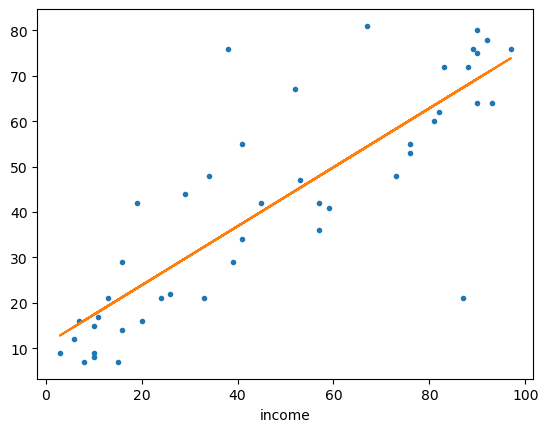

In [43]:
from matplotlib import pyplot as plt
plt.plot(df['prestige'], df['income'],'.')
plt.plot(df['prestige'], prediction)
# plt.plot(x, y)
plt.xlabel("prestige")
plt.xlabel("income")

__Check visually normality of residuals__

In [45]:
pred = res_2.predict(df)
actual = df['income']
resid = actual - pred  # same as res_2.resid

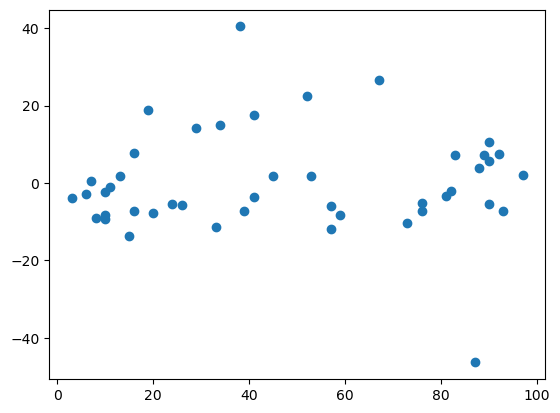

In [47]:
plt.plot(df['prestige'],resid, 'o')

(array([ 1.,  0.,  0.,  2., 19., 11.,  6.,  4.,  1.,  1.]),
 array([-46.40643935, -37.72299114, -29.03954294, -20.35609473,
        -11.67264653,  -2.98919832,   5.69424989,  14.37769809,
         23.0611463 ,  31.74459451,  40.42804271]),
 <BarContainer object of 10 artists>)

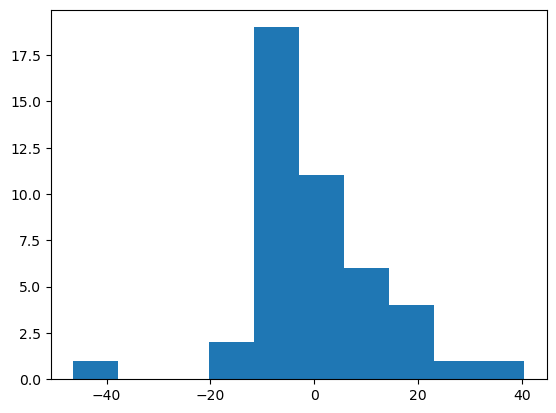

In [48]:
plt.hist(resid)

The residuals don't look gaussian at all.

## Finding the right model

__Import dataset from `data.dta`. Explore dataset (statistics, plots)__

__Our goal is to explain `z` by `x` and `y`. Run a regression.__

__Examine the residuals of the regression. What's wrong? Remedy?__

## Taylor Rule

In 1993, John taylor, estimated, using US data the regression: $i_t = i^{\star} + \alpha_{\pi} \pi_t + \alpha_{\pi} y_t$ where $\pi_t$ is inflation and $y_t$ the output gap (let's say deviation from real gdp from the trend).
He found that both coefficients were not significantly different from $0.5$.
Our goal, is to replicate the same analysis.

__Import macro data from statsmodels (https://www.statsmodels.org/devel/datasets/generated/macrodata.html)__

__Create a database with all variables of interest including detrended gdp__

__Run the basic regression__

__Which control variables would you propose to add? Does it increase prediction power? How do you interpret that?__